In [3]:
import csv
import numpy as np
from collections import defaultdict
from matplotlib import pyplot
import pandas
import matplotlib

In [4]:
BLANKS=["","RBNF1", "RBNF2", "RBNF", "0", "RBNF 1", "RBNF 2"]
TOTAL=2734
TOTAL_INTER= 2645

In [5]:
def loadCsvData(fileName):
	matrix = []
	# open a file
	with open(fileName) as f:
		reader = csv.reader(f)
        # loop over each row in the file
		for row in reader:

			# cast each value to a float
			doubleRow = []
			for value in row:
				doubleRow.append(value.strip())

			# store the row into our matrix
			matrix.append(doubleRow)
	return matrix

In [6]:
data= loadCsvData("data/metadata.csv")

In [7]:
data=pandas.DataFrame(data[1:], columns=data[0])

In [8]:
interviewtxt =loadCsvData("data/interview text file to ids.csv")

In [9]:
interviewtxt=pandas.DataFrame(interviewtxt[1:], columns=interviewtxt[0])

In [10]:
ids_to_years=defaultdict(lambda: defaultdict(lambda:"0"))
for i in range(len(interviewtxt)):
    date=interviewtxt["date_of_first_interview"][i]
    year=date[date.rfind('/')+1:]
    ids=interviewtxt["interviewee_ids"][i].split(';')
    no_transcript=interviewtxt["no_transcript"][i]
    for num in ids:
        ids_to_years[num]["year"]= str(year)
        if no_transcript=="TRUE" and ids_to_years[num]["included"]=="0":
            ids_to_years[num]["included"]=False
        else:
            ids_to_years[num]["included"]=True

In [11]:
database=defaultdict(lambda: defaultdict(lambda:0))
for i in range(len(data)):
    if ids_to_years[data.loc[i, "interviewee_id"]]["included"]==False:
        continue
    for atr in data.columns:
        if atr== "researcher_assumed_birth_decade":
            continue
        if atr== "researcher_assumed_race":
            continue
        value= data[atr][i]
        if value in BLANKS and atr=="\ufeffbirth_decade":
            value= data.loc[i, "researcher_assumed_birth_decade"]
        if value in BLANKS and atr=="identified_race":
            value= data.loc[i, "researcher_assumed_race"]
        if value in BLANKS and atr == "real_interviewee_birth_year":
            value= data.loc[i, "approximate_interviewee_birth_year"]
        database[data.loc[i, "interviewee_id"]][atr]=value
    database[data.loc[i, "interviewee_id"]]["interview_year"]=ids_to_years[data.loc[i, "interviewee_id"]]["year"]

In [12]:
text_to_ids=defaultdict(lambda: defaultdict(lambda:"0"))
for i in range(len(interviewtxt)):
    if interviewtxt["no_transcript"][i]=="TRUE":
        continue
    name=interviewtxt.at[i, interviewtxt.columns[0]]
    name=name[:name.rfind('.')]
    name=name.replace('\'','_')
    people=interviewtxt["interviewee_ids"][i].split(';')
    women=False
    for j in people:
        if database[j]["sex"]=="Female":
            women=True
            break
    if not women:
        continue
    text_to_ids[name]["id"]=people
    date=interviewtxt["date_of_first_interview"][i]
    text_to_ids[name]["interview year"]= date[date.rfind("/")+1:]

In [13]:
dataformatted=defaultdict(lambda: defaultdict(lambda:0))
for i in database : 
    if database[i]["sex"]=="Male":
        continue
    for atr in database[i]:
        value= database[i][atr]
        if value not in BLANKS:
            dataformatted[atr][value]+=1
for cat in dataformatted:
    total=0
    for x in dataformatted[cat]:
        total+= dataformatted[cat][x]
    dataformatted[cat]["No Info"]= TOTAL-total

In [14]:
ids_to_info=defaultdict(lambda: defaultdict(lambda:0))
for ids in database:
    ids_to_info[ids]["birth_decade"]=database[ids]["\ufeffbirth_decade"]
    ids_to_info[ids]["education"]=database[ids]["education"]
    ids_to_info[ids]["collection"]=database[ids]["collection_id"]
    ids_to_info[ids]["sex"]=database[ids]["sex"]
    ids_to_info[ids]["race"]=database[ids]["identified_race"]
    ids_to_info[ids]["interview_year"]=database[ids]["interview_year"]
    ids_to_info[ids]["birth_year"]=database[ids]["real_interviewee_birth_year"]

In [34]:
myfile = open("data/all_sexual_assault.txt", encoding="latin1")
txt = myfile.read()
myfile.close()

files=[]
tokens=txt.split()
for i in tokens:
    num= i.find("Files\\\\")
    if not num==-1:
        if not i.find("_")==-1:
            files.append(i.strip())
names=set()
for i in files:
    i=i[i.find("\\\\",8)+2:-1]
    names.add(i.strip())


In [35]:
df_total_corpus = pandas.DataFrame([[TOTAL_INTER, len(names), int(len(names)/TOTAL_INTER*100)]],columns=["Total Corpus Interviews", "Number of Interviews Containing Sexual Assault Speech Events", "Percentage Of Interviews Containing Sexual Assault Speech Events"], index=[""])

In [36]:
display(df_total_corpus)

,Total Corpus Interviews,Number of Interviews Containing Sexual Assault Speech Events,Percentage Of Interviews Containing Sexual Assault Speech Events
,2645,348,13


Speech Events

In [30]:
myfile = open("data/all_sexual_assault.txt", encoding="latin1")
txt = myfile.read()
myfile.close()

num_speech_events_SH=0

txt=txt.split("\n")
for i in txt:
    num= i.find(">")
    if not num==-1:
        tokens=i.split()
        num_speech_events_SH+=int(tokens[3])
print(num_speech_events_SH)

668


In [31]:
myfile = open("data/all_events.txt", encoding="latin1")
txt = myfile.read()
myfile.close()

num_speech_events=0

txt=txt.split("\n")
for i in txt:
    num= i.find(">")
    if not num==-1:
        tokens=i.split()
        num_speech_events+=int(tokens[3])
print(num_speech_events)

881


In [44]:
df_total_corpus = pandas.DataFrame([[num_speech_events, num_speech_events_SH, int(100*num_speech_events_SH/num_speech_events)]],columns=["Total Speech Events", "Number of Speech Events Regarding Sexual Assault", "Percentage Of Speech Events Containing Sexual Assault"], index=[""])

In [45]:
display(df_total_corpus)

,Total Speech Events,Number of Speech Events Regarding Sexual Assault,Percentage Of Speech Events Containing Sexual Assault
,881,668,75


In [37]:
years=[]
for i in range(1870, 2000, 10):
    years.append(str(i))

In [38]:
DECADE_INCREMENTS=2
birthyear_to_number_of_interviews_white=defaultdict(lambda:0)
birthyear_to_number_of_interviews_CSH_white=defaultdict(lambda:0)
birthyear_to_number_of_interviews_black=defaultdict(lambda:0)
birthyear_to_number_of_interviews_CSH_black=defaultdict(lambda:0)
for i in text_to_ids:
    for j in text_to_ids[i]["id"]:
        if  database[j]["identified_race"]=="Black or African American":
            birthyear_to_number_of_interviews_black[database[j]["\ufeffbirth_decade"]]+=1
        elif database[j]["identified_race"]=="White":
            birthyear_to_number_of_interviews_white[database[j]["\ufeffbirth_decade"]]+=1
for i in names:
    for j in text_to_ids[i]["id"]:
        if database[j]["identified_race"]=="White":
            birthyear_to_number_of_interviews_CSH_white[database[j]["\ufeffbirth_decade"]]+=1
        elif database[j]["identified_race"]=="Black or African American":
            birthyear_to_number_of_interviews_CSH_black[database[j]["\ufeffbirth_decade"]]+=1

total_white=[]
hits_formatted_white=[]
total_black=[]
hits_formatted_black=[]
for i in years:
    total_white.append(birthyear_to_number_of_interviews_white[str(i)])
    hits_formatted_white.append(birthyear_to_number_of_interviews_CSH_white[str(i)])
    total_black.append(birthyear_to_number_of_interviews_black[str(i)])
    hits_formatted_black.append(birthyear_to_number_of_interviews_CSH_black[str(i)])
print(total_white, hits_formatted_white)
percentage_withNI_white=[]
percentage_withNI_black=[]
total_white_blocks=[]
hits_formatted_white_blocks=[]
total_black_blocks=[]
hits_formatted_black_blocks=[]
for i in range(0,len(years),DECADE_INCREMENTS):
    white_total=0
    white_hits=0
    black_total=0
    black_hits=0
    print(i)
    for j in range(i, min(i+DECADE_INCREMENTS, len(years))):
        white_total+= total_white[j]
        white_hits+= hits_formatted_white[j]
        black_total+= total_black[j]
        black_hits+= hits_formatted_black[j]
    if white_total==0:
        percentage_withNI_white.append(0)
    else:    
        percentage_withNI_white.append(int(white_hits/white_total*100))
    if black_total==0:
        percentage_withNI_black.append(0)
    else:
        percentage_withNI_black.append(int(black_hits/black_total*100))
    total_white_blocks.append(white_total)
    hits_formatted_white_blocks.append(white_hits)
    total_black_blocks.append(black_total)
    hits_formatted_black_blocks.append(black_hits)
print(percentage_withNI_black)


[1, 9, 36, 66, 150, 268, 207, 253, 122, 57, 31, 25, 3] [0, 1, 3, 7, 1, 13, 15, 47, 25, 6, 4, 2, 0]
0
2
4
6
8
10
12
[14, 17, 12, 16, 17, 20, 0]


[0 1 2 3 4 5 6]


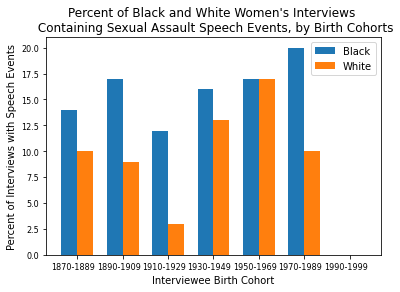

In [53]:
N = 7

ind = np.arange(N) 
print(ind)

# some example data
    
    
black = np.array(percentage_withNI_black)
white=np.array(percentage_withNI_white)


x = range(N)


# and plot it
fig, ax = pyplot.subplots()
hm=ax.bar(ind-.35/2, black, .35, label="Black")
total=ax.bar(ind+.35/2, white, .35, label="White")
ax.set_xticks(np.array([x for x in range(7)]))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=4)
dx = .25
dy=0
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
ax.set_xticklabels(['1870-1889', '1890-1909', '1910-1929', '1930-1949', '1950-1969', '1970-1989', '1990-1999'])
ax.set_title("Percent of Black and White Women's Interviews \n Containing Sexual Assault Speech Events, by Birth Cohorts")
ax.set_ylabel('Percent of Interviews with Speech Events')
ax.set_xlabel('Interviewee Birth Cohort')
pyplot.setp(ax.get_xticklabels(), horizontalalignment='right')
pyplot.legend()

In [54]:
df_percentage_in_birth_cohort_by_race = pandas.DataFrame([total_black_blocks, hits_formatted_black_blocks, percentage_withNI_black, total_white_blocks, hits_formatted_white_blocks, percentage_withNI_white], columns=['1870-1889', '1890-1909', '1910-1929', '1930-1949', '1950-1969', '1970-1989', '1990-1999'], index=["Number of Interviews with Black Women", "Number of Interviews with Black Women Containing Sexual Assault Speech Events", "Percentage of Black Women in Birth Cohort whose Interviews Containing Sexual Assault Speech Events", "Number of Interviews with White Women", "Number of Interviews with White Women Containing Sexual Assault Speech Events", "Percentage of White Women in Birth Cohort whose Interviews Containing Sexual Assault Speech Events"])

In [55]:
display(df_percentage_in_birth_cohort_by_race)

,1870-1889,1890-1909,1910-1929,1930-1949,1950-1969,1970-1989,1990-1999
Number of Interviews with Black Women,7,82,210,533,341,25,2
Number of Interviews with Black Women Containing Sexual Assault Speech Events,1,14,26,90,60,5,0
Percentage of Black Women in Birth Cohort whose Interviews Containing Sexual Assault Speech Events,14,17,12,16,17,20,0
Number of Interviews with White Women,10,102,418,460,179,56,3
Number of Interviews with White Women Containing Sexual Assault Speech Events,1,10,14,62,31,6,0
Percentage of White Women in Birth Cohort whose Interviews Containing Sexual Assault Speech Events,10,9,3,13,17,10,0


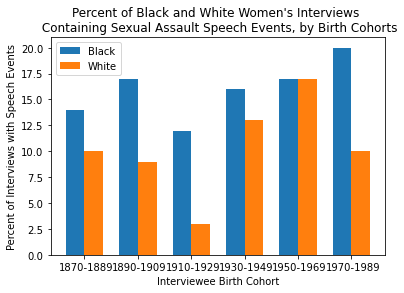

In [56]:
N = 6

ind = np.arange(N) 

# some example data
    
    
black = np.array(percentage_withNI_black[0:6])
white=np.array(percentage_withNI_white[0:6])


x = range(N)


# and plot it
fig, ax = pyplot.subplots()
hm=ax.bar(ind-.35/2, black, .35, label="Black")
total=ax.bar(ind+.35/2, white, .35, label="White")
ax.set_xticks(ind)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=4)
dx = .4
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
ax.set_xticklabels(['1870-1889','1890-1909', '1910-1929', '1930-1949', '1950-1969', '1970-1989'])
ax.set_title("Percent of Black and White Women's Interviews \n Containing Sexual Assault Speech Events, by Birth Cohorts")
ax.set_ylabel('Percent of Interviews with Speech Events')
ax.set_xlabel('Interviewee Birth Cohort')
pyplot.setp(ax.get_xticklabels(), horizontalalignment='right')
pyplot.legend()

In [57]:
print(dataformatted["education"])

defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fe5e70659d0>, {'High school graduate': 228, "Bachelor's degree": 756, 'Graduate or professional degree': 1336, "Associate's degree": 47, 'Some college': 144, '9th to 12th grade but no diploma': 124, 'Less than 9th grade': 53, 'No Info': 46})


In [58]:
DECADE_INCREMENTS=2
EDUCATION_BREAKDOWN=[["High school graduate", '9th to 12th grade but no diploma', 'Less than 9th grade'], ["Bachelor's degree","Associate's degree",'Some college'], ['Graduate or professional degree']]
birthyear_to_number_of_interviews_up_to_12=defaultdict(lambda:0)
birthyear_to_number_of_interviews_up_to_college=defaultdict(lambda:0)
birthyear_to_number_of_interviews_grad=defaultdict(lambda:0)
birthyear_to_number_of_interviews_up_to_12_SH=defaultdict(lambda:0)
birthyear_to_number_of_interviews_up_to_college_SH=defaultdict(lambda:0)
birthyear_to_number_of_interviews_grad_SH=defaultdict(lambda:0)
for i in text_to_ids:
    for j in text_to_ids[i]["id"]:
        if  database[j]["education"] in EDUCATION_BREAKDOWN[0]:
            birthyear_to_number_of_interviews_up_to_12[database[j]["\ufeffbirth_decade"]]+=1
        elif database[j]["education"]  in EDUCATION_BREAKDOWN[1]:
            birthyear_to_number_of_interviews_up_to_college[database[j]["\ufeffbirth_decade"]]+=1
        elif database[j]["education"]  in EDUCATION_BREAKDOWN[2]:
            birthyear_to_number_of_interviews_grad[database[j]["\ufeffbirth_decade"]]+=1
for i in names:
    for j in text_to_ids[i]["id"]:
        if  database[j]["education"]  in EDUCATION_BREAKDOWN[0]:
            birthyear_to_number_of_interviews_up_to_12_SH[database[j]["\ufeffbirth_decade"]]+=1
        elif database[j]["education"]  in EDUCATION_BREAKDOWN[1]:
            birthyear_to_number_of_interviews_up_to_college_SH[database[j]["\ufeffbirth_decade"]]+=1
        elif database[j]["education"]  in EDUCATION_BREAKDOWN[2]:
            birthyear_to_number_of_interviews_grad_SH[database[j]["\ufeffbirth_decade"]]+=1
        else:
            print(database[j]["education"])

total_up_to_12=[]
total_up_to_college=[]
total_grad=[]
hits_up_to_12=[]
hits_up_to_college=[]
hits_grad=[]
for i in years:
    total_up_to_12.append(birthyear_to_number_of_interviews_up_to_12[str(i)])
    total_up_to_college.append(birthyear_to_number_of_interviews_up_to_college[str(i)])
    total_grad.append(birthyear_to_number_of_interviews_grad[str(i)])
    hits_up_to_12.append(birthyear_to_number_of_interviews_up_to_12_SH[str(i)])
    hits_up_to_college.append(birthyear_to_number_of_interviews_up_to_college_SH[str(i)])
    hits_grad.append(birthyear_to_number_of_interviews_grad_SH[str(i)])
percentage_up_to_12=[]
percentage_up_to_college=[]
percentage_grad=[]
total_up_to_12_blocks=[]
total_up_to_college_blocks=[]
total_grad_blocks=[]
hits_up_to_12_blocks=[]
hits_up_to_college_blocks=[]
hits_grad_blocks=[]
for i in range(0,len(years),DECADE_INCREMENTS):
    up_to_12_total=0
    up_to_college_total=0
    grad_total=0
    up_to_12_hits=0
    up_to_college_hits=0
    grad_hits=0
    for j in range(i, min(i+DECADE_INCREMENTS, len(years))):
        up_to_12_total+= total_up_to_12[j]
        up_to_college_total+= total_up_to_college[j]
        grad_total+= total_grad[j]
        up_to_12_hits+= hits_up_to_12[j]
        up_to_college_hits+= hits_up_to_college[j]
        grad_hits+= hits_grad[j]
    if up_to_12_total==0:
        percentage_up_to_12.append(0)
    else:    
        percentage_up_to_12.append(int(up_to_12_hits/up_to_12_total*100))
    if up_to_college_total==0:
        percentage_up_to_college.append(0)
    else:    
        percentage_up_to_college.append(int(up_to_college_hits/up_to_college_total*100))
    if grad_total==0:
        percentage_grad.append(0)
    else:    
        percentage_grad.append(int(grad_hits/grad_total*100))
    total_up_to_12_blocks.append(up_to_12_total)
    total_up_to_college_blocks.append(up_to_college_total)
    total_grad_blocks.append(grad_total)
    hits_up_to_12_blocks.append(up_to_12_hits)
    hits_up_to_college_blocks.append(up_to_college_hits)
    hits_grad_blocks.append(grad_hits)
print(percentage_up_to_college)


0
0
0
RBNF 1
0
0
0
0
[18, 14, 4, 14, 18, 12, 0]


[0 1 2 3 4 5 6]


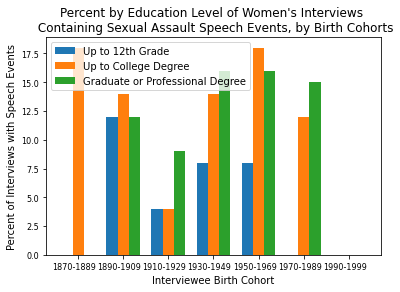

In [59]:
N = 7

ind = np.arange(N) 
print(ind)

# some example data
    
    
up_to_12 = np.array(percentage_up_to_12)
up_to_college=np.array(percentage_up_to_college)
grad=np.array(percentage_grad)


x = range(N)


# and plot it
fig, ax = pyplot.subplots()
hm=ax.bar(ind-.25, up_to_12, .25, label="Up to 12th Grade")
total=ax.bar(ind, up_to_college, .25, label="Up to College Degree")
total=ax.bar(ind+.25, grad, .25, label="Graduate or Professional Degree")
ax.set_xticks(np.array([x for x in range(7)]))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=4)
dx = .25
dy=0
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
ax.set_xticklabels(['1870-1889', '1890-1909', '1910-1929', '1930-1949', '1950-1969', '1970-1989', '1990-1999'])
ax.set_title("Percent by Education Level of Women's Interviews \n Containing Sexual Assault Speech Events, by Birth Cohorts")
ax.set_ylabel('Percent of Interviews with Speech Events')
ax.set_xlabel('Interviewee Birth Cohort')
pyplot.setp(ax.get_xticklabels(), horizontalalignment='right')
pyplot.legend()

In [61]:
df_percentage_in_birth_cohort_by_education = pandas.DataFrame([total_up_to_12_blocks, hits_up_to_12_blocks, percentage_up_to_12, total_up_to_college_blocks, hits_up_to_college_blocks, percentage_up_to_college, total_grad_blocks, hits_grad_blocks, percentage_grad], columns=['1870-1889', '1890-1909', '1910-1929', '1930-1949', '1950-1969', '1970-1989', '1990-1999'], index=["Number of Interviews in Education Level Up to 12th Grade", "Number of Interviews in Education Level Up to 12th Grade Containing Sexual Assault Speech Events", "Percentage of Interviews in Education Level Up to 12th Grade Containing Sexual Assault Speech Events", "Number of Interviews in Education Level Up to College Degree", "Number of Interviews in Education Level Up to College Degree Containing Sexual Assault Speech Events", "Percentage of Interviews in Education Level Up to College Degree Containing Sexual Assault Speech Events", "Number of Interviews in Education Level Graduate or Professional Degree", "Number of Interviews in Education Level Graduate or Professional Degree Containing Sexual Assault Speech Events", "Percentage of Interviews in Education Level Graduate or Professional Degree Containing Sexual Assault Speech Events"])

In [62]:
display(df_percentage_in_birth_cohort_by_education)

,1870-1889,1890-1909,1910-1929,1930-1949,1950-1969,1970-1989,1990-1999
Number of Interviews in Education Level Up to 12th Grade,3,24,192,90,37,2,0
Number of Interviews in Education Level Up to 12th Grade Containing Sexual Assault Speech Events,0,3,8,8,3,0,0
Percentage of Interviews in Education Level Up to 12th Grade Containing Sexual Assault Speech Events,0,12,4,8,8,0,0
Number of Interviews in Education Level Up to College Degree,11,68,242,348,213,33,5
Number of Interviews in Education Level Up to College Degree Containing Sexual Assault Speech Events,2,10,10,52,39,4,0
Percentage of Interviews in Education Level Up to College Degree Containing Sexual Assault Speech Events,18,14,4,14,18,12,0
Number of Interviews in Education Level Graduate or Professional Degree,2,90,226,619,354,69,2
Number of Interviews in Education Level Graduate or Professional Degree Containing Sexual Assault Speech Events,0,11,22,101,60,11,0
Percentage of Interviews in Education Level Graduate or Professional Degree Containing Sexual Assault Speech Events,0,12,9,16,16,15,0


[0 1 2 3 4 5]


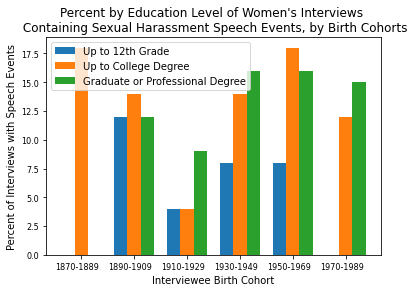

In [64]:
N = 6

ind = np.arange(N) 
print(ind)

# some example data
    
    
up_to_12 = np.array(percentage_up_to_12[0:6])
up_to_college=np.array(percentage_up_to_college[0:6])
grad=np.array(percentage_grad[0:6])


x = range(N)


# and plot it
fig, ax = pyplot.subplots()
hm=ax.bar(ind-.25, up_to_12, .25, label="Up to 12th Grade")
total=ax.bar(ind, up_to_college, .25, label="Up to College Degree")
total=ax.bar(ind+.25, grad, .25, label="Graduate or Professional Degree")
ax.set_xticks(ind)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=4)
dx = .25
dy=0
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
ax.set_xticklabels(['1870-1889','1890-1909', '1910-1929', '1930-1949', '1950-1969', '1970-1989'])
ax.set_title("Percent by Education Level of Women's Interviews \n Containing Sexual Harassment Speech Events, by Birth Cohorts")
ax.set_ylabel('Percent of Interviews with Speech Events')
ax.set_xlabel('Interviewee Birth Cohort')
pyplot.setp(ax.get_xticklabels(), horizontalalignment='right')
pyplot.legend()

In [65]:
year_to_number_of_interviews=defaultdict(lambda:0)
year_to_number_of_interviews_SH=defaultdict(lambda:0)
for i in text_to_ids:
    year_to_number_of_interviews[text_to_ids[i]["interview year"]]+=1
for i in names:
    year_to_number_of_interviews_SH[text_to_ids[i]["interview year"]]+=1

years=[]
for i in range(1972, 2019, 1):
    years.append(str(i))
total=[]
hits_formatted=[]
for i in years:
    total.append(year_to_number_of_interviews[i])
    hits_formatted.append(year_to_number_of_interviews_SH[i])
percentage_int_year=[]
totalnum=sum(total)
print(totalnum)
for i in range(len(years)):
    if total[i]==0:
        percentage_int_year.append(0)
    else:    
        percentage_int_year.append(int(hits_formatted[i]/total[i]*100))



2635


In [66]:
total_by_int_year_for_table=[]
hits_by_int_year_for_table=[]
percentage_by_int_year_for_table=[]
for i in range(int(years[0])//10*10, int(years[-1])//10*10+1, 10):
    total=0
    hits=0
    for i in range(i, i+10, 1):
        total+= year_to_number_of_interviews[str(i)]
        hits+= year_to_number_of_interviews_SH[str(i)]
    total_by_int_year_for_table.append(total)
    hits_by_int_year_for_table.append(hits)
    percentage_by_int_year_for_table.append(int(hits/total*100))

In [67]:
df_percentage_in_int_year = pandas.DataFrame([total_by_int_year_for_table, hits_by_int_year_for_table, percentage_by_int_year_for_table], columns=['1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019'], index=["Number of Interviews Conducted in Decade", "Number of Interviews Conducted in Decade Containing Sexual Assault Speech Events", "Percentage of Interviews Conducted in Decade Containing Sexual Assault Speech Events"])

In [68]:
display(df_percentage_in_int_year)

,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019
Number of Interviews Conducted in Decade,139,118,50,1088,1240
Number of Interviews Conducted in Decade Containing Sexual Assault Speech Events,28,10,1,159,147
Percentage of Interviews Conducted in Decade Containing Sexual Assault Speech Events,20,8,2,14,11


In [69]:
total_by_int_year_for_table=[]
hits_by_int_year_for_table=[]
percentage_by_int_year_for_table=[]
for i in range(int(years[0])//5*5, int(years[-1])//5*5+1, 5):
    total=0
    hits=0
    for i in range(i, i+5, 1):
        total+= year_to_number_of_interviews[str(i)]
        hits+= year_to_number_of_interviews_SH[str(i)]
    total_by_int_year_for_table.append(total)
    hits_by_int_year_for_table.append(hits)
    percentage_by_int_year_for_table.append(int(hits/total*100))

In [70]:
df_percentage_in_int_year = pandas.DataFrame([total_by_int_year_for_table, hits_by_int_year_for_table, percentage_by_int_year_for_table], columns=['1970-1974', '1975-1979', '1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019'], index=["Number of Interviews Conducted in Decade", "Number of Interviews Conducted in Decade Containing Sexual Assault Speech Events", "Percentage of Interviews Conducted in Decade Containing Sexual Assault Speech Events"])

In [71]:
display(df_percentage_in_int_year)

,1970-1974,1975-1979,1980-1984,1985-1989,1990-1994,1995-1999,2000-2004,2005-2009,2010-2014,2015-2019
Number of Interviews Conducted in Decade,32,107,28,90,16,34,417,671,911,329
Number of Interviews Conducted in Decade Containing Sexual Assault Speech Events,5,23,2,8,1,0,61,98,119,28
Percentage of Interviews Conducted in Decade Containing Sexual Assault Speech Events,15,21,7,8,6,0,14,14,13,8


In [72]:
INCREMENTS=5
years=[]
for i in range(1971, 2019):
    years.append(i)
total=[]
hits_formatted=[]
for i in years:
    total_num=0
    hits_num=0
    for j in range(max(1971, i-2), min(2019, i+3)):
        total_num+=year_to_number_of_interviews[str(j)]
        hits_num+= year_to_number_of_interviews_SH[str(j)]
    total.append(total_num)
    hits_formatted.append(hits_num)
percentage_int_year=[]
totalnum=sum(total)
print(totalnum)
for i in range(len(years)):
    if total[i]==0:
        percentage_int_year.append(0)
    else:    
        percentage_int_year.append(int(hits_formatted[i]/total[i]*100))
print(total)
print(hits_formatted)

13095
[9, 32, 49, 73, 102, 120, 107, 94, 73, 59, 38, 28, 33, 44, 36, 85, 90, 86, 72, 64, 17, 16, 14, 21, 26, 30, 34, 55, 108, 196, 310, 417, 530, 584, 710, 717, 671, 715, 781, 752, 805, 911, 861, 813, 676, 504, 329, 198]
[1, 5, 7, 13, 18, 25, 23, 22, 16, 11, 4, 2, 1, 2, 2, 8, 8, 9, 8, 7, 1, 1, 0, 0, 0, 0, 0, 2, 7, 22, 45, 61, 87, 103, 117, 108, 98, 86, 89, 80, 95, 119, 110, 97, 83, 58, 28, 21]


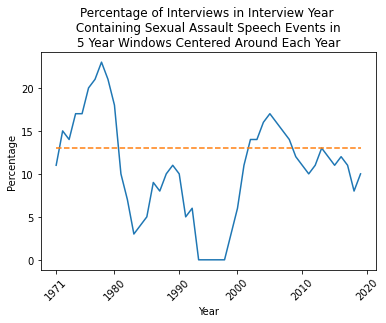

In [74]:
Year = range(len(percentage_int_year))
percentages = percentage_int_year
pyplot.plot(Year, percentages)
pyplot.plot(Year, [int(100*sum(hits_formatted)/totalnum) for i in range(len(percentage_int_year)) ], linestyle="dashed")
pyplot.title('Percentage of Interviews in Interview Year \n Containing Sexual Assault Speech Events in \n'+str(INCREMENTS)+ " Year Windows Centered Around Each Year")
pyplot.xlabel('Year')
pyplot.ylabel('Percentage')
pyplot.xticks(rotation = 45)
positions = [len(percentage_int_year)*i//5 for i in range(6)]
labels = (1971, 1980, 1990, 2000, 2010, 2020)
pyplot.xticks(positions, labels)
pyplot.show()